First, we read the data and stored it in a DataFrame.

In [75]:
# Import packages
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('student_lifestyle_dataset_full..csv')

We did a quick initial analysis of the dataset.

In [76]:
df.head()

Student_ID  Study_Hours_Per_Day  Extracurricular_Hours_Per_Day  \
0           1                  6.9                            3.8   
1           2                  5.3                            3.5   
2           3                  5.1                            3.9   
3           4                  6.5                            2.1   
4           5                  8.1                            0.6   

   Sleep_Hours_Per_Day  Social_Hours_Per_Day  Physical_Activity_Hours_Per_Day  \
0                  8.7                   2.8                              1.8   
1                  8.0                   4.2                              3.0   
2                  9.2                   1.2                              4.6   
3                  7.2                   1.7                              6.5   
4                  6.5                   2.2                              6.6   

  Stress_Level  Gender  Grades  
0     Moderate    Male    7.48  
1          Low  Female    6.88  
2          Low    Male    6.68  
3     Moderate    Male    7.20  
4         High    Male    8.78

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Student_ID                       2000 non-null   int64  
 1   Study_Hours_Per_Day              2000 non-null   float64
 2   Extracurricular_Hours_Per_Day    2000 non-null   float64
 3   Sleep_Hours_Per_Day              2000 non-null   float64
 4   Social_Hours_Per_Day             2000 non-null   float64
 5   Physical_Activity_Hours_Per_Day  2000 non-null   float64
 6   Stress_Level                     2000 non-null   object 
 7   Gender                           2000 non-null   object 
 8   Grades                           2000 non-null   float64
dtypes: float64(6), int64(1), object(2)
memory usage: 140.8+ KB


In [79]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
categorical_df = df.select_dtypes(include=['object'])

ranges = numeric_df.max() - numeric_df.min()
std_devs = numeric_df.std()
means = numeric_df.mean()

stats_summary = pd.DataFrame({
    "Min": numeric_df.min(),
    "Max": numeric_df.max(),
    "Range": ranges,
    "Mean": means,
    "Standard Deviation": std_devs
})

print("=== Range and Standard Deviation of Numeric Attributes ===")
print(stats_summary)

print("\n=== Frequency counts of Categorical Attributes ===")
for col in categorical_df.columns:
    print(f"\n{col}:")
    counts = categorical_df[col].value_counts()
    print(dict(counts))

=== Range and Standard Deviation of Numeric Attributes ===
                                 Min     Max   Range         Mean  \
Student_ID                       1.0  2000.0  1999.0  1000.500000   
Study_Hours_Per_Day              5.0    10.0     5.0     7.475800   
Extracurricular_Hours_Per_Day    0.0     4.0     4.0     1.990100   
Sleep_Hours_Per_Day              5.0    10.0     5.0     7.501250   
Social_Hours_Per_Day             0.0     6.0     6.0     2.704550   
Physical_Activity_Hours_Per_Day  0.0    13.0    13.0     4.328300   
Grades                           5.6    10.0     4.4     7.789825   

                                 Standard Deviation  
Student_ID                               577.494589  
Study_Hours_Per_Day                        1.423888  
Extracurricular_Hours_Per_Day              1.155855  
Sleep_Hours_Per_Day                        1.460949  
Social_Hours_Per_Day                       1.688514  
Physical_Activity_Hours_Per_Day            2.514110  
Grades    

We observed that the minimums and maximums correlate with values that we would expect to have for hours or grades.

We checked for any NaN values.

In [80]:
rows_with_nan = df[df.isna().any(axis=1)]
len(rows_with_nan)

0

As Student ID does not bring any insight into the analysis, we decided to drop the column.

In [81]:
df = df.drop(['Student_ID'], axis=1)
df.head()

Study_Hours_Per_Day  Extracurricular_Hours_Per_Day  Sleep_Hours_Per_Day  \
0                  6.9                            3.8                  8.7   
1                  5.3                            3.5                  8.0   
2                  5.1                            3.9                  9.2   
3                  6.5                            2.1                  7.2   
4                  8.1                            0.6                  6.5   

   Social_Hours_Per_Day  Physical_Activity_Hours_Per_Day Stress_Level  Gender  \
0                   2.8                              1.8     Moderate    Male   
1                   4.2                              3.0          Low  Female   
2                   1.2                              4.6          Low    Male   
3                   1.7                              6.5     Moderate    Male   
4                   2.2                              6.6         High    Male   

   Grades  
0    7.48  
1    6.88  
2    6.68  
3    7.20  
4    8.78

Since the hours are recorded per day, we did a check to make sure the hours add up to 24 hours.

First, we computed the sum of the columns representing hours data for each row.

In [82]:
hour_sum = sum([df['Study_Hours_Per_Day'], df['Extracurricular_Hours_Per_Day'], df['Sleep_Hours_Per_Day'], df['Social_Hours_Per_Day'], df['Physical_Activity_Hours_Per_Day']])

Then we checked if the sum on each row is equal to 24. We used the method isclose to compare to 24, since the hours are represented as floating points.

In [83]:
rows_where_hours_sum_is_not_24 = df[~np.isclose(hour_sum, 24)]

We observed there are no rows that do not respect the 24 hours sum.

In [84]:
len(rows_where_hours_sum_is_not_24)

0

We continued by analysing the categorical columns, exploring which categories were present in the dataset.

In [85]:
stress_level_categories = df['Stress_Level'].unique()
print(stress_level_categories)

gender_categories = df['Gender'].unique()
print(gender_categories)

['Moderate' 'Low' 'High']
['Male' 'Female']


We visualised the data using seaborn.

<Axes: xlabel='Stress_Level', ylabel='Count'>

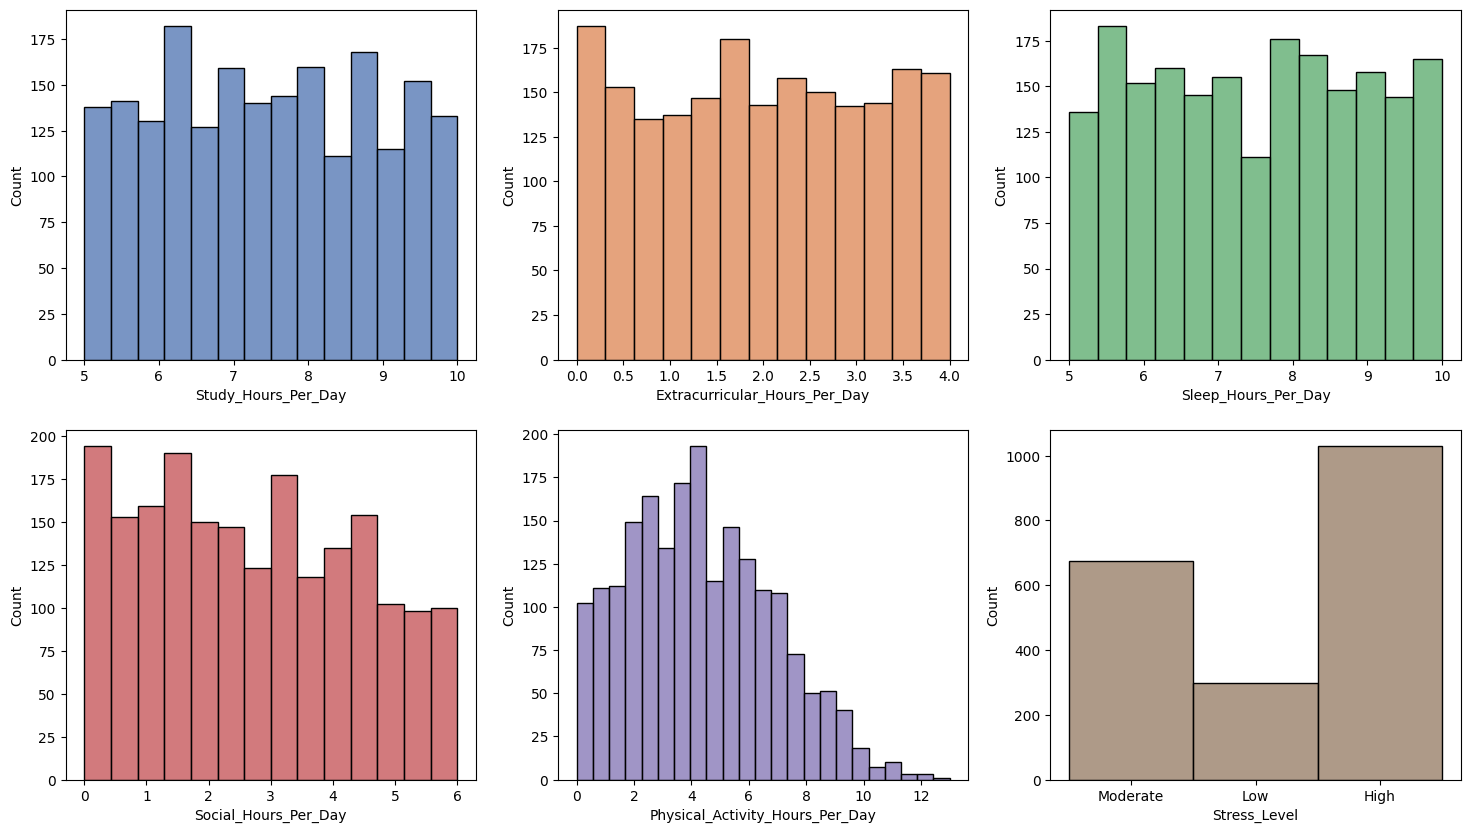

In [86]:
palette = sns.color_palette('deep', 7)
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

sns.histplot(ax=axes[0, 0], data=df, x='Study_Hours_Per_Day',color=palette[0])
sns.histplot(ax=axes[0, 1], data=df, x='Extracurricular_Hours_Per_Day', color=palette[1])
sns.histplot(ax=axes[0, 2], data=df, x='Sleep_Hours_Per_Day', color=palette[2])
sns.histplot(ax=axes[1, 0], data=df, x='Social_Hours_Per_Day', color=palette[3])
sns.histplot(ax=axes[1, 1], data=df, x='Physical_Activity_Hours_Per_Day', color=palette[4])
sns.histplot(ax=axes[1, 2], data=df, x='Stress_Level', color=palette[5])

We then checked the grading scale by selecting the minimum and maximum grades. We deduced that the scale was up to 10, with only passing grades being recorded (above 5).

In [87]:
print(min(df['Grades']))
print(max(df['Grades']))

5.6
10.0


We visualised the grades and they follow a Gaussian distribution as expected.

<Axes: xlabel='Grades', ylabel='Count'>

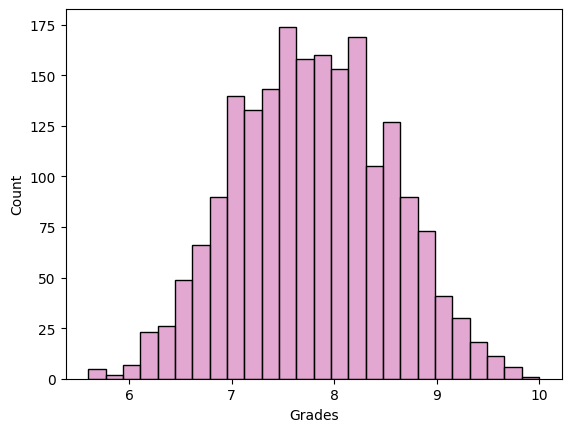

In [88]:
sns.histplot(data=df, x='Grades', color=palette[6])

Then we converted the categorical values to numerical. For gender we used the LabelEncoder from sklearn.preprocessing. For stress level we thought an intuitive approach would be to assign the values in the order of magnitude, so Low - 0, Moderate - 1 and High - 2.

In [90]:
import sklearn

label_encoder_gender = sklearn.preprocessing.LabelEncoder()
df['Gender'] = label_encoder_gender.fit_transform(df['Gender'])

stress_level_mapping = {'Low': 0, 'Moderate': 1, 'High': 2}
df['Stress_Level'] = df['Stress_Level'].replace(stress_level_mapping)

df.head()

Study_Hours_Per_Day  Extracurricular_Hours_Per_Day  Sleep_Hours_Per_Day  \
0                  6.9                            3.8                  8.7   
1                  5.3                            3.5                  8.0   
2                  5.1                            3.9                  9.2   
3                  6.5                            2.1                  7.2   
4                  8.1                            0.6                  6.5   

   Social_Hours_Per_Day  Physical_Activity_Hours_Per_Day  Stress_Level  \
0                   2.8                              1.8             1   
1                   4.2                              3.0             0   
2                   1.2                              4.6             0   
3                   1.7                              6.5             1   
4                   2.2                              6.6             2   

   Gender  Grades  
0       1    7.48  
1       0    6.88  
2       1    6.68  
3       1    7.20  
4       1    8.78

We looked for outliers in the data by plotting box plots for each attribute.

<Axes: xlabel='Stress_Level'>

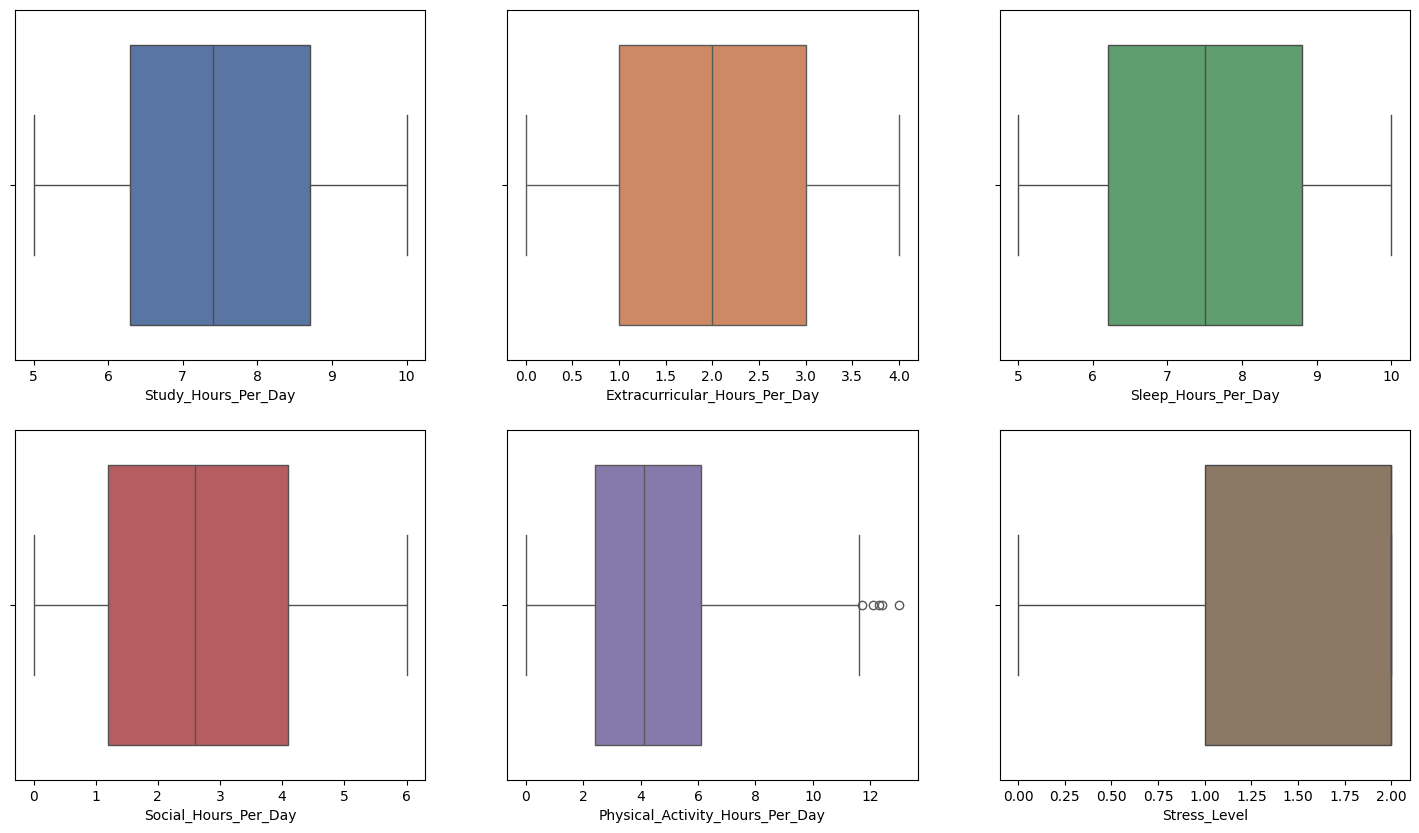

In [91]:
palette = sns.color_palette('deep', 7)
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

sns.boxplot(ax=axes[0, 0], data=df, x='Study_Hours_Per_Day',color=palette[0])
sns.boxplot(ax=axes[0, 1], data=df, x='Extracurricular_Hours_Per_Day', color=palette[1])
sns.boxplot(ax=axes[0, 2], data=df, x='Sleep_Hours_Per_Day', color=palette[2])
sns.boxplot(ax=axes[1, 0], data=df, x='Social_Hours_Per_Day', color=palette[3])
sns.boxplot(ax=axes[1, 1], data=df, x='Physical_Activity_Hours_Per_Day', color=palette[4])
sns.boxplot(ax=axes[1, 2], data=df, x='Stress_Level', color=palette[5])

Based on the box plots we deduced that the values from Pyhisical_Activity_Hours_Per_Day that are above 11 will be discarded.

In [92]:
df = df[df['Physical_Activity_Hours_Per_Day'] < 11]

Since the numerical attributes are on the same scale (0-24 hours), we have not standardized the data.

We computed the correlation matrix.

<Axes: title={'center': 'Heatmap'}>

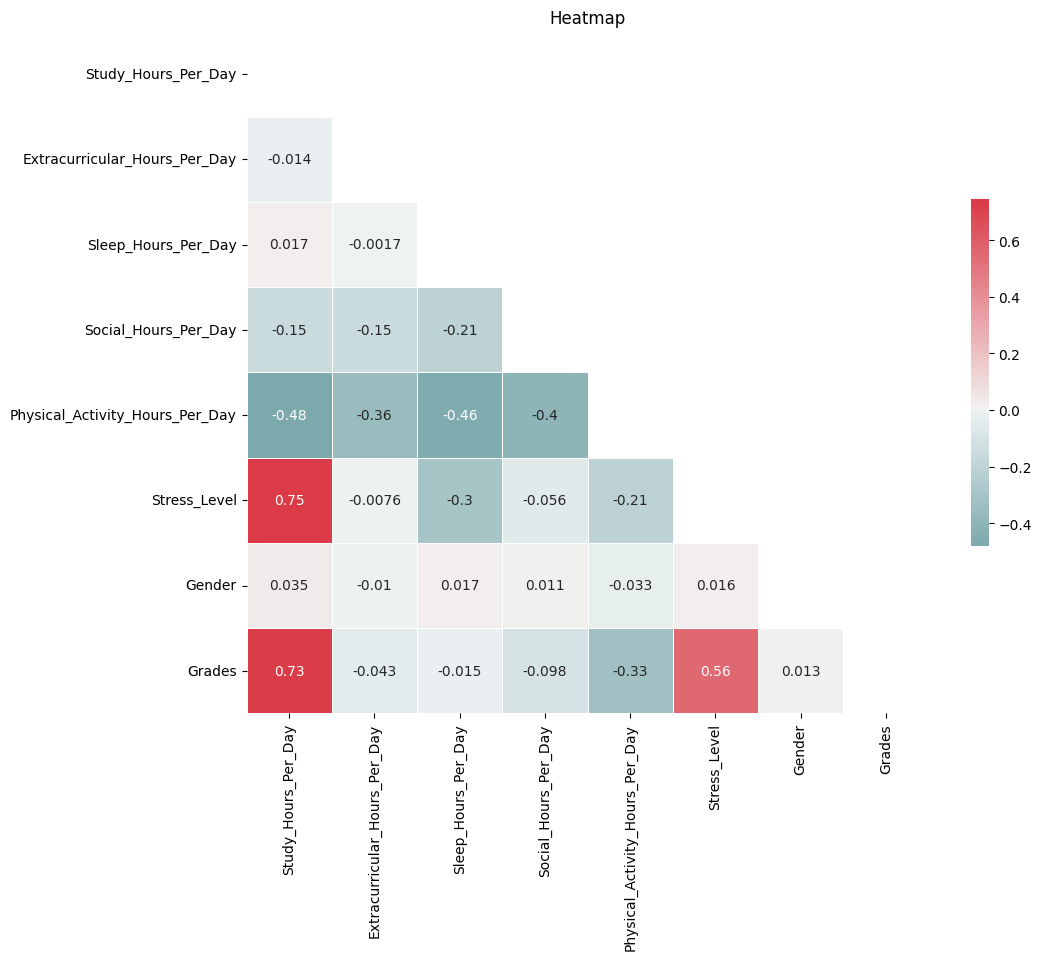

In [93]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
plt.title('Heatmap')
cmap = sns.diverging_palette(200, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": .5}, annot=True)

The correlation matrix further enhances that the study hours are highly correlated to the stress levels.

Finally, we stored the hours data (so only the Study_Hours_Per_Day, Extracurricular_Hours_Per_Day, Sleep_Hours_Per_Day, Social_Hours_Per_Day, Physical_Activity_Hours_Per_Day columns) inside a numpy matrix X with 2000 rows and 5 columns. We chose the y vector as the Stress_Level column.

In [94]:
X = df[['Study_Hours_Per_Day', 'Extracurricular_Hours_Per_Day', 'Sleep_Hours_Per_Day', 'Social_Hours_Per_Day', 'Physical_Activity_Hours_Per_Day']]
print('X shape:', X.shape)

y = df['Stress_Level']
print('y shape:', y.shape)

X shape: (1986, 5)
y shape: (1986,)


We plotted a matrix scatter plot for all attributes in X, coloring based on the Stress Level.

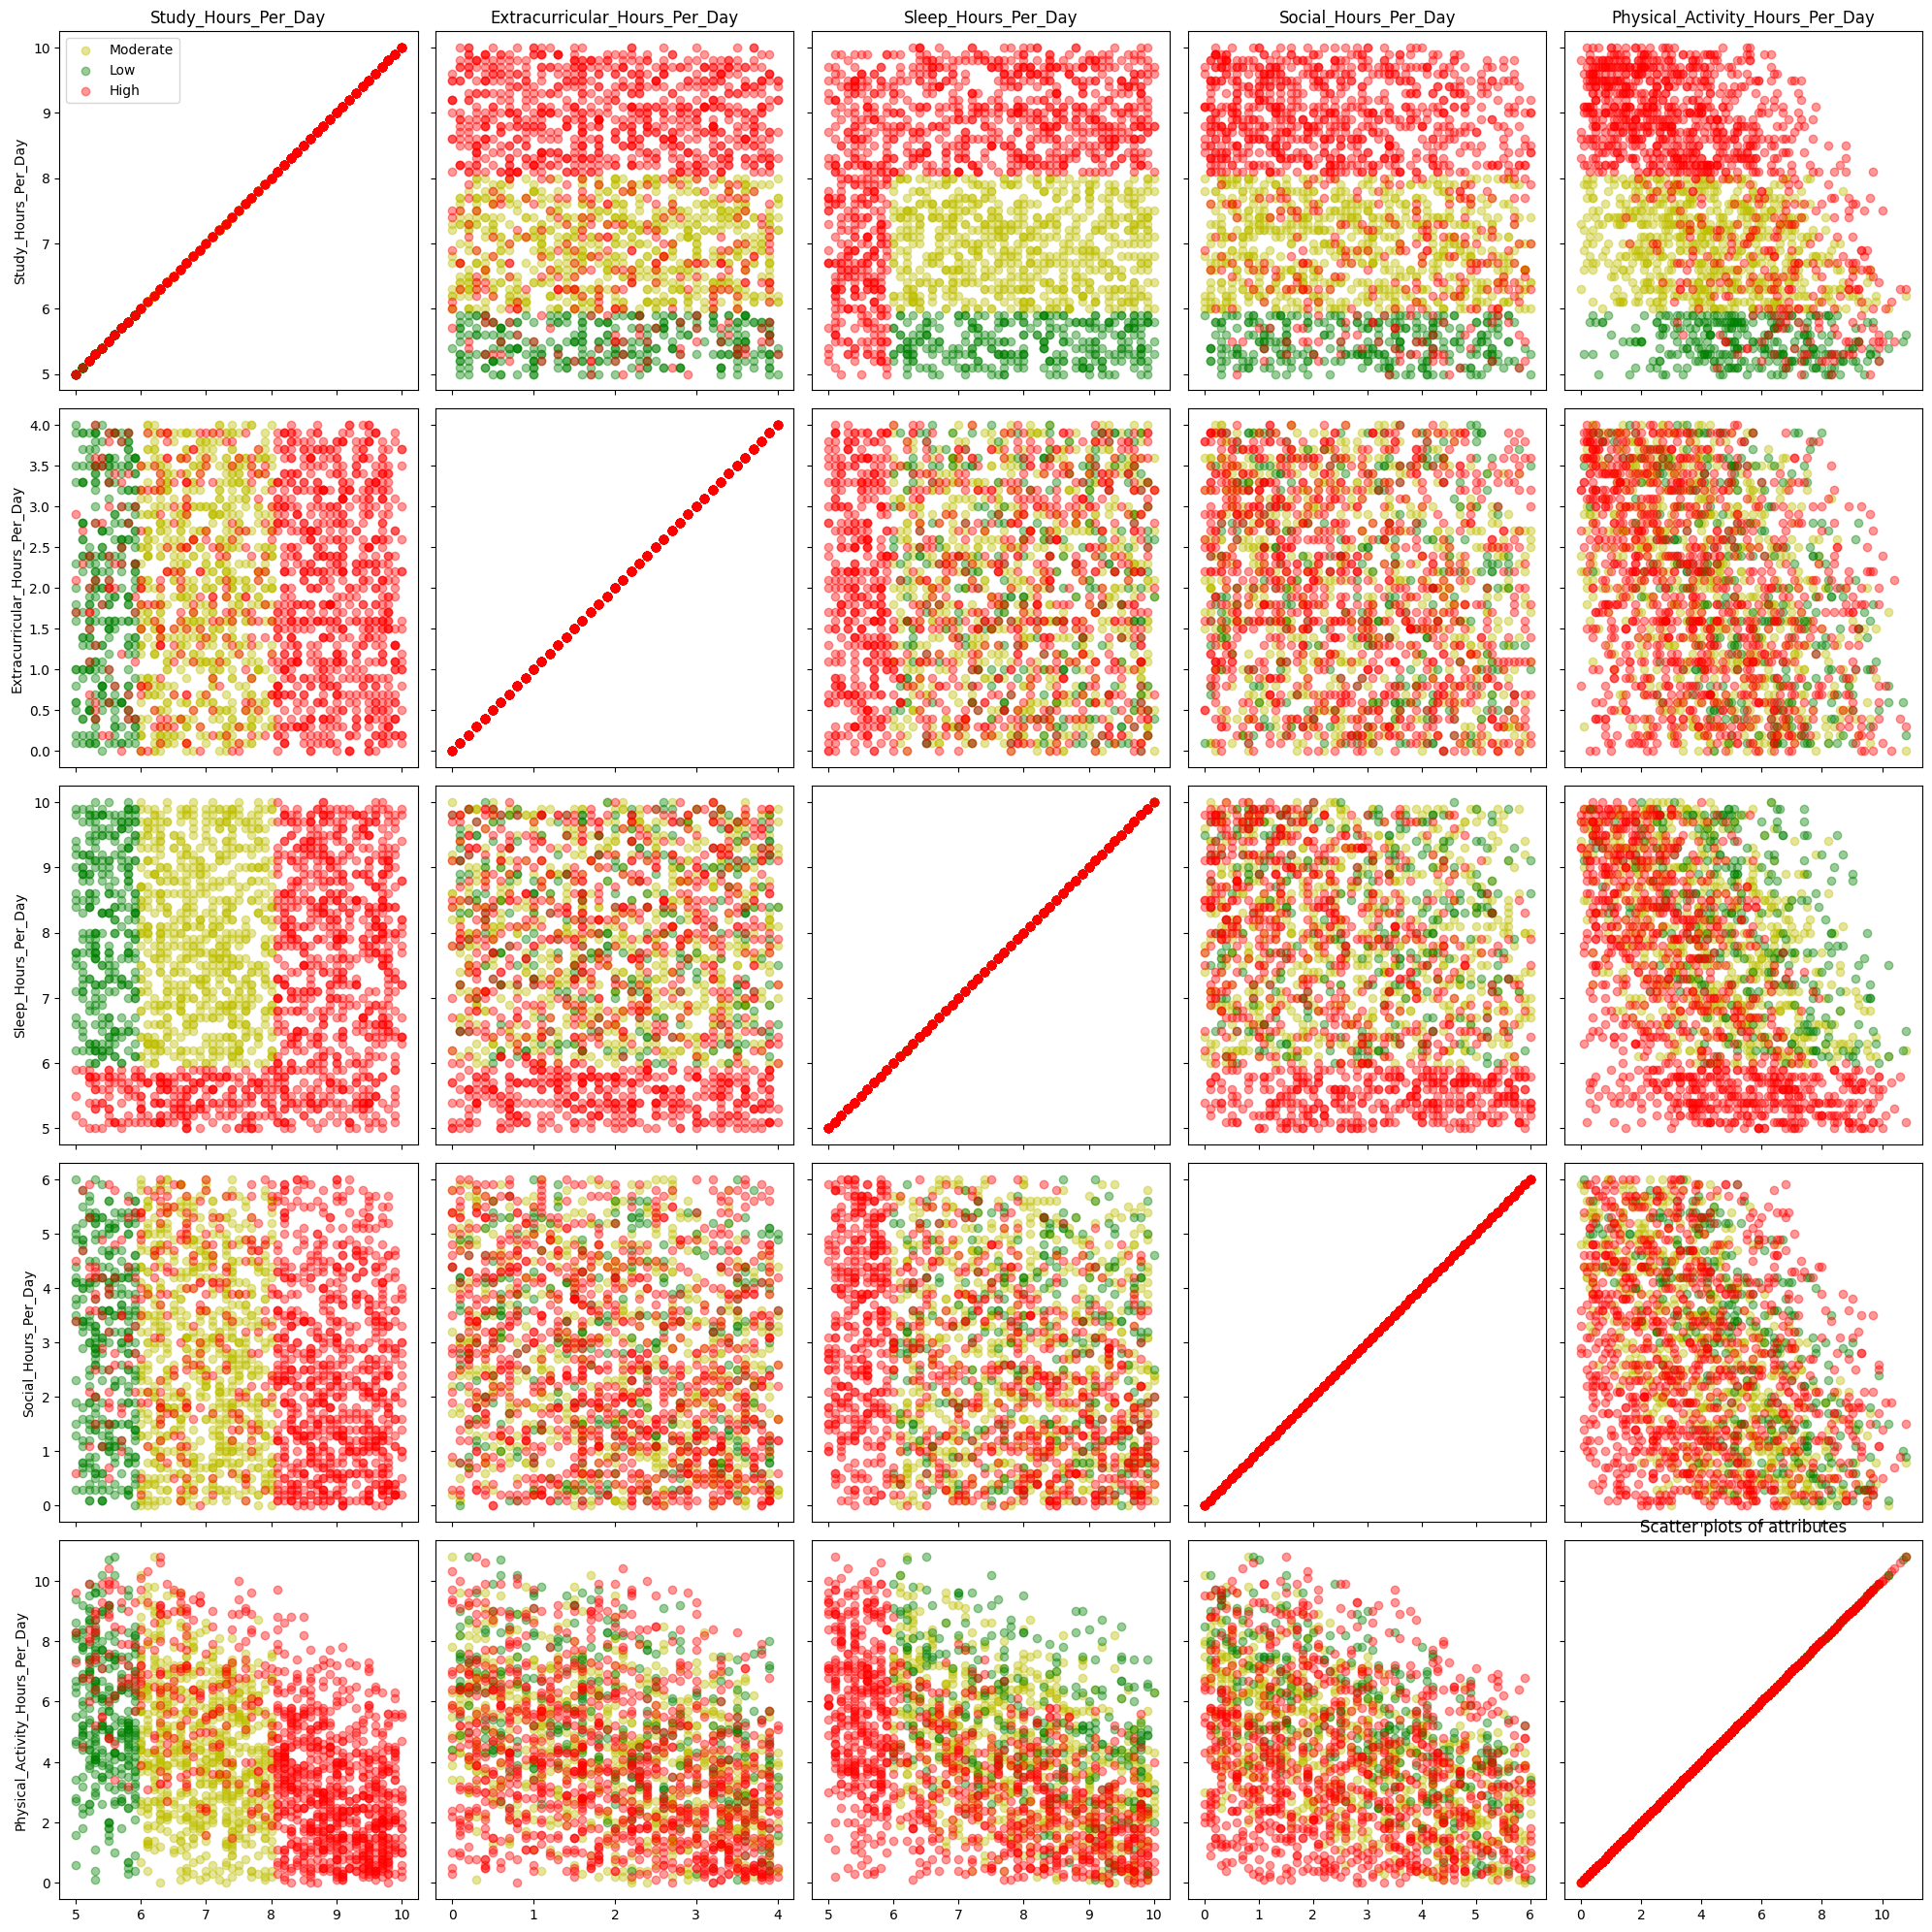

In [95]:
import matplotlib.pyplot as plt

number_of_columns = X.shape[1]
color_map = {0: 'g', 1: 'y', 2: 'r'}
fig, axs = plt.subplots(number_of_columns, number_of_columns, figsize=(20, 20), sharex='col', sharey='row')

for i in range(number_of_columns):
    for j in range(number_of_columns):
        for color in df['Stress_Level'].unique():
            mask = (df['Stress_Level'] == color)
            axs[i, j].scatter(
                x=X[mask].iloc[:, j],
                y=X[mask].iloc[:, i],
                # Get the label from the mapping above of {'Low': 0, 'Moderate': 1, 'High': 2}
                label=[key for key, value in stress_level_mapping.items() if value == color][0],
                alpha = 0.4,
                color=color_map.get(color)
        )

for col in range(number_of_columns):
    axs[0, col].set_title(X.columns[col])
    axs[col, 0].set_ylabel(X.columns[col])

axs[0,0].legend(loc='upper left')
plt.tight_layout(pad=1.)
plt.title('Scatter plots of attributes')
plt.show()

We can already see from the plots that the study hours have an influence on the stress level patterns.

Then we computed the PCA and plotted the percent of variance explained by the principal components as well as the cumulative percentage of variance explained.

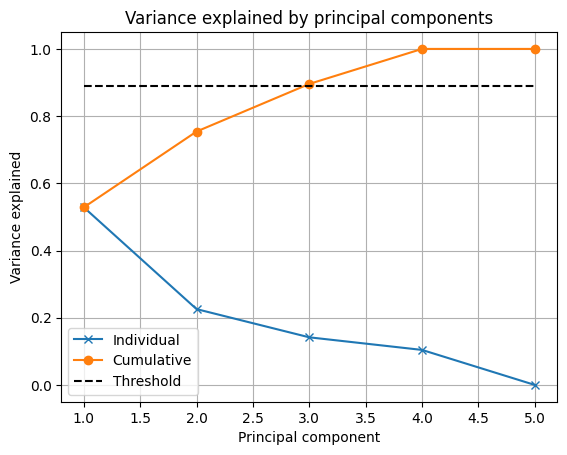

In [96]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X)

V = pca.components_.T
rho = pca.explained_variance_ratio_
threshold = 0.89

plt.figure()
plt.plot(range(1, len(rho) + 1), rho, "x-")
plt.plot(range(1, len(rho) + 1), np.cumsum(rho), "o-")
plt.plot([1, len(rho)], [threshold, threshold], "k--")
plt.title("Variance explained by principal components")
plt.xlabel("Principal component")
plt.ylabel("Variance explained")
plt.legend(["Individual", "Cumulative", "Threshold"])
plt.grid()
plt.show()

Based on the graph we can conclude that 89% of the variation in the data can be explained by the first 3 principal components.

We continued by plotting the first 3 components in terms of all the attributes in X.

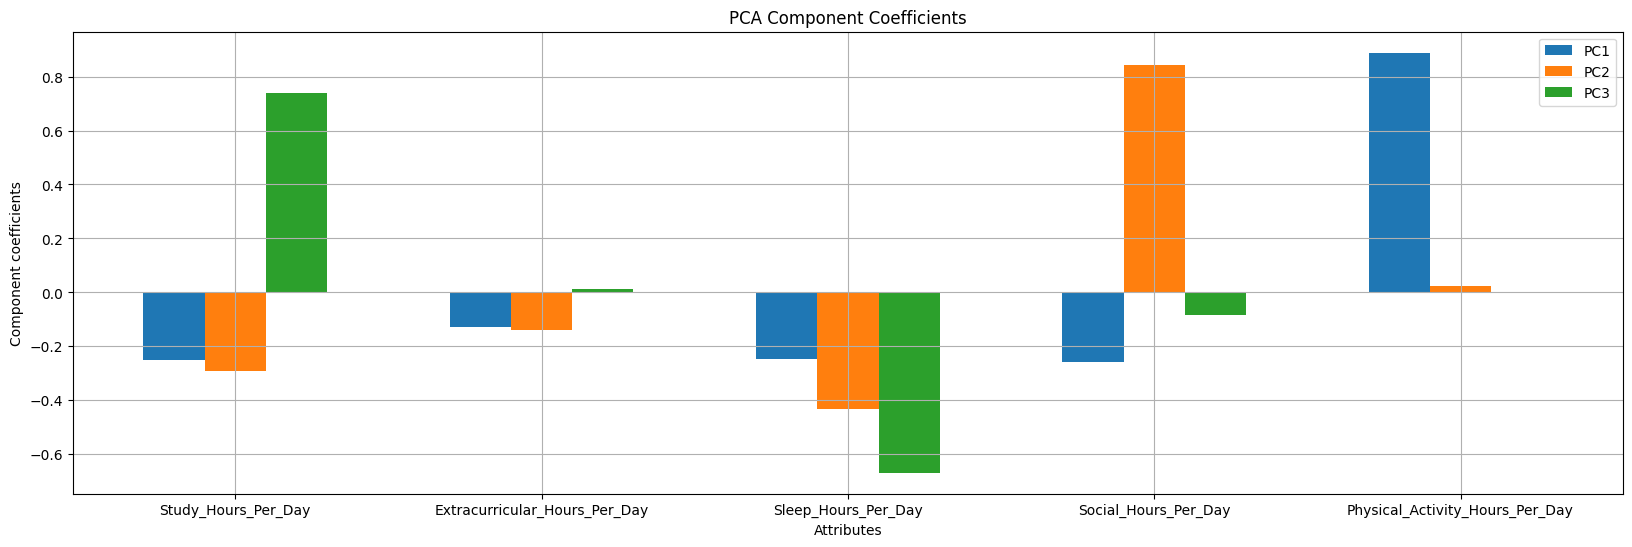

In [97]:
bar_width = 0.2
r = np.arange(1, X.shape[1] + 1)

fig = plt.figure(figsize=(20, 6))
plt.title("PCA Component Coefficients")
for i, pc in enumerate(V[:, :3].T):
    plt.bar(r + i * bar_width, pc, width=bar_width, label=f"PC{i+1}")
plt.xticks(r + bar_width, X.columns)
plt.xlabel("Attributes")
plt.ylabel("Component coefficients")
plt.legend()
plt.grid()
plt.show()

First we projected the data onto the first 2 principal components.

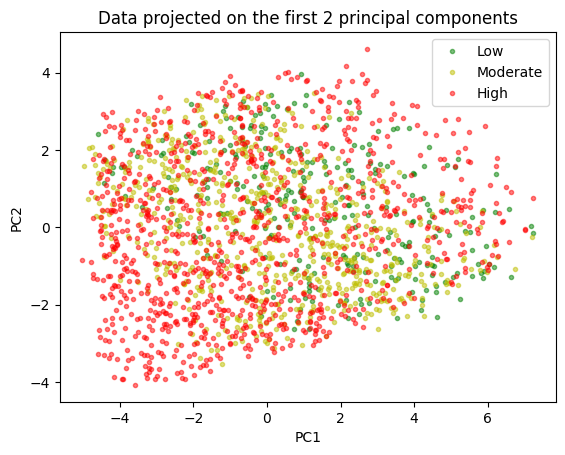

In [98]:
PC_idxs = [0, 1]
unique_classes = np.unique(y)

B = pca.transform(X)

fig = plt.figure()
plt.title("Data projected on the first 2 principal components")

for stress_level in unique_classes:
    mask = (y == stress_level)
    plt.plot(B[mask, PC_idxs[0]], B[mask, PC_idxs[1]], 
             ".", 
             alpha=0.5, 
             color=color_map.get(stress_level), 
             label=[key for key, value in stress_level_mapping.items() if value == stress_level][0]
             )

plt.xlabel(f"PC{PC_idxs[0] + 1}")
plt.ylabel(f"PC{PC_idxs[1] + 1}")
plt.legend()
plt.show()

We then plotted the projection of data on the first 3 principal components.

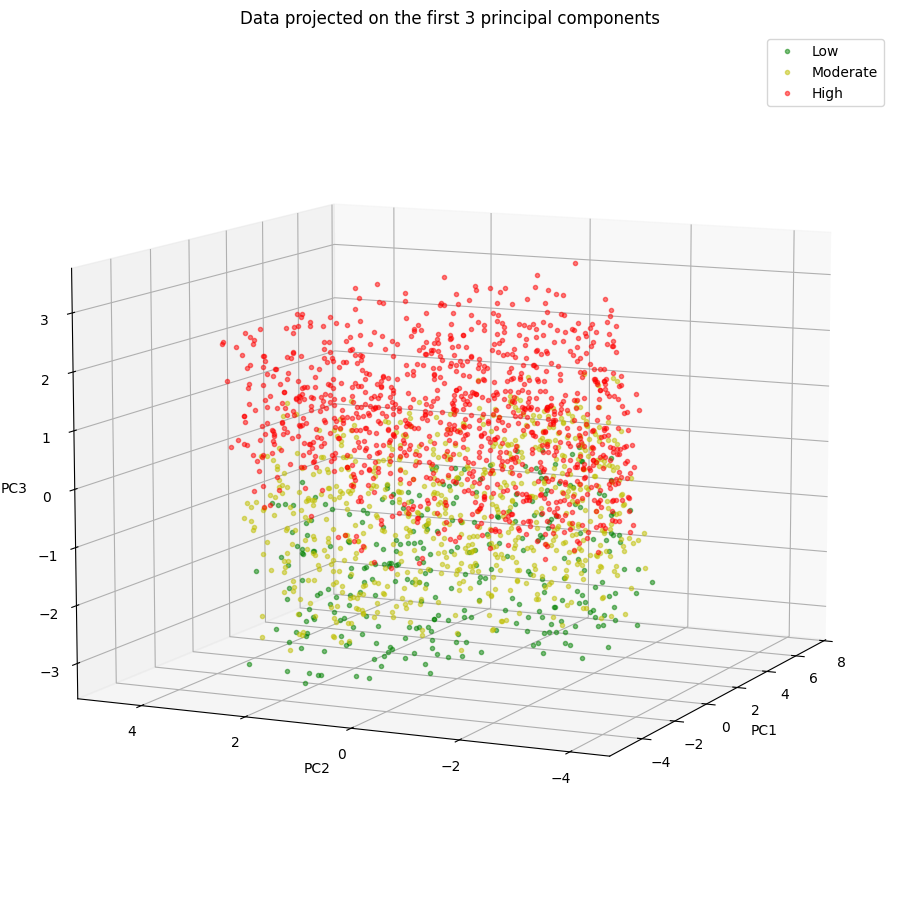

In [99]:
PC_idxs = [0, 1, 2]
unique_classes = np.unique(y)

B = pca.transform(X)

fig = plt.figure(figsize=(25, 15))
ax = fig.add_subplot(121, projection='3d')
ax.set_title('Data projected on the first 3 principal components')
ax.view_init(elev=10, azim=-155)

for stress_level in unique_classes:
    mask = (y == stress_level)
    ax.plot(B[mask, PC_idxs[0]], B[mask, PC_idxs[1]], B[mask, PC_idxs[2]], 
            ".", 
            alpha=0.5, 
            color=color_map.get(stress_level), 
            label=[key for key, value in stress_level_mapping.items() if value == stress_level][0]
            )

ax.set_xlabel(f"PC{PC_idxs[0] + 1}")
ax.set_ylabel(f"PC{PC_idxs[1] + 1}")
ax.set_zlabel(f"PC{PC_idxs[2] + 1}")
ax.legend()
plt.show()